In [1]:
from generator import BOTR_Generator
from coco_utils import all_category_names
from utils import imshow, print_pretty

=> loading coco asset: dataset/category_map.pickle


In [2]:
# takes ~7s
botr = BOTR_Generator("dataset/")

=> loading coco asset: dataset/coco_organized.pickle
=> loading coco object - annotations/captions_train2017.json
loading annotations into memory...
Done (t=0.85s)
creating index...
index created!


=> loading coco asset: dataset/category_map.pickle


100%|██████████| 0.9902534484863281/0.99 [00:01<00:00,  1.83s/it] 


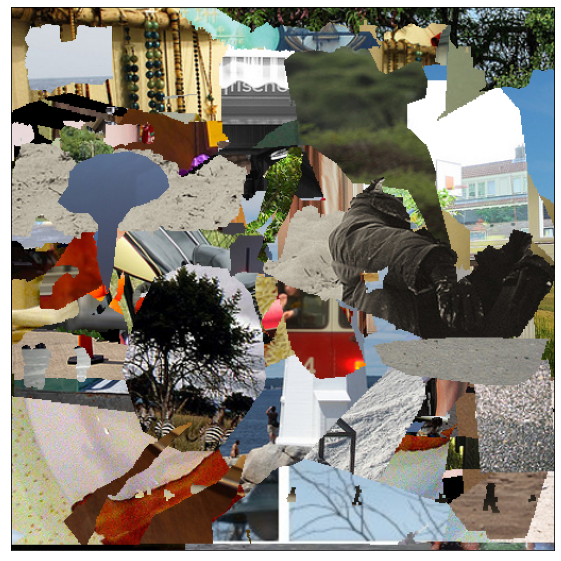

In [4]:
allowedCateg = all_category_names(exclude=['person', 'other'])
# allowedCateg = random.sample(allowedCateg, random.randint(1,len(allowedCateg)))
# allowedCateg = ["sky"]

blendConfig = {
  "use_blending" : False,
  "pyr_kernel_size" : 5,
  "pyr_kernel_sigma" : 1.,
  "mask_kernel_size" : 5,
  "mask_kernel_sigma" : 1.,
  "max_depth" : 5,
  "blur_masks" : True,
  "blur_iters" : 1,
  "plot_levels" : False
}

config = {
  # average size of each patch (1 being mean of distribution)
  'avgPatchSize' : 0.1,
  # average size variance of each patch added
  'avgPatchVariance' : 0.1,
  # minimum area of a patch added, expressed as percentage px after masking
  'minPatchArea' : 0.001, 
  # maximim area of a patch added, expressed as percentage px after masking
  'maxPatchArea' : 0.4, 
  # target percentage of pixels to fill
  'targetFill' : 0.99,
  # output image size
  'outputSize' : (512, 512),
  # prevent supercategories from appearing
  'allowedCategories' : allowedCateg,
  # choose either "stuff_ann", "instance_ann", or "any"
  'ann_key' : "any",
  # image blending options
  'image_blending' : blendConfig
}

# image, metadata = botr.generate_botr(config, outpath="out/")
image, metadata = botr.generate_botr()
imshow(image)
# imshow(image, metadata['name'])
# print(metadata["description"])

In [1]:
from utils import load_json, save_json, print_pretty, sort_dict
from generator import generate_name
import random

In [6]:
def generate_name(metadata, modify_inplace=True):
    word_len = random.randint(3, 20)
    sorted_attrs = dict(sorted(metadata.items(), key=lambda item: item[1], reverse=True))
    name = ""
    attr_idx = 0
    while len(name) < word_len:
        key = list(sorted_attrs.keys())[attr_idx]
        slice_len = int((sorted_attrs[key] * word_len) ** 2)
        if slice_len == 0:
            slice_len = 1
        offset = random.randint(0, len(key)-slice_len-1)
        name += key[offset:offset+slice_len]
        attr_idx += 1
    # sets the name attribute of metadata
    if modify_inplace:
        metadata["name"] = name
    return name, metadata

In [4]:
metadata = load_json('out/9.json')

sorted_attrs = sort_dict(metadata["category_percentage"])
print_pretty(sorted_attrs)
# name = generate_name(metadata)

{
  "plant": 0.2799873352050781,
  "vehicle": 0.23099517822265625,
  "raw-material": 0.1172943115234375,
  "textile": 0.06676101684570312,
  "sports": 0.055816650390625,
  "wall": 0.048976898193359375,
  "electronic": 0.0459442138671875,
  "food-stuff": 0.028446197509765625,
  "solid": 0.02082061767578125,
  "animal": 0.018463134765625,
  "outdoor": 0.014148712158203125,
  "furniture-stuff": 0.01345062255859375,
  "indoor": 0.013248443603515625,
  "window": 0.011653900146484375,
  "furniture": 0.0085906982421875,
  "sky": 0.007480621337890625,
  "accessory": 0.00540924072265625,
  "kitchen": 0.003734588623046875,
  "food": 0.002246856689453125,
  "building": 0,
  "structural": 0,
  "floor": 0,
  "ceiling": 0,
  "ground": 0,
  "water": 0,
  "other": 0,
  "person": 0,
  "appliance": 0
}
